In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd
import os
import seaborn as sns
import io
import PIL
from PIL import Image
from scipy import fftpack
import urllib3
import IPython
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


In [3]:
data_file = r'/Users/jm186072/Documents/Jeetendra/Projects/1Japan-Presales/2018_0731_data_explanation/L1.xlsx'

In [4]:
data = pd.read_excel(data_file)

In [23]:
data.head(20)

,0.0,-0.02,-0.04,-0.06,-0.08,-0.1,-0.12,-0.14,-0.16,-0.18,...,-40.82,-40.84,-40.86,-40.88,-40.9,-40.92,-40.94,-40.96,-40.98,-41.0
0.00,-0.039948,-0.388065,-0.067688,-0.081092,-0.102532,-0.132672,-0.264709,-0.260943,-0.226739,-0.219416,...,-0.012997,-0.010883,-0.010425,-0.008040,-0.010678,-0.014113,-0.013463,-0.012458,-0.011290,-0.006005
0.02,-0.042340,-0.204777,-0.063131,-0.071552,-0.106296,-0.283599,-0.269963,-0.248943,-0.229630,-0.221444,...,-0.011987,-0.010774,-0.010370,-0.008753,-0.011343,-0.014916,-0.014258,-0.012331,-0.011626,-0.005265
0.04,-0.044734,-0.211509,-0.063392,-0.068672,-0.114452,-0.284496,-0.273038,-0.249290,-0.230008,-0.221547,...,-0.011177,-0.010391,-0.010481,-0.011210,-0.012005,-0.014775,-0.013577,-0.012436,-0.011392,-0.006091
0.06,-0.135480,-0.218243,-0.041514,-0.071134,-0.112517,-0.285248,-0.273500,-0.252403,-0.230383,-0.221646,...,-0.010837,-0.007633,-0.010558,-0.010311,-0.012491,-0.015708,-0.013673,-0.014971,-0.012021,-0.006915
0.08,-0.142293,-0.220845,-0.038696,-0.073216,-0.106164,-0.286000,-0.272508,-0.252475,-0.230755,-0.221165,...,-0.010178,-0.007162,-0.010486,-0.010658,-0.012929,-0.015849,-0.017437,-0.016168,-0.011572,-0.007936
0.10,-0.145232,-0.227350,-0.035865,-0.068154,-0.112125,-0.288193,-0.273343,-0.251805,-0.231124,-0.220821,...,-0.007431,-0.010436,-0.008776,-0.010683,-0.014239,-0.014550,-0.017715,-0.014310,-0.012759,-0.010701
0.12,-0.151810,-0.248310,-0.024654,-0.068826,-0.129265,-0.289087,-0.270620,-0.254316,-0.233228,-0.222789,...,-0.009275,-0.009506,-0.009170,-0.010998,-0.014742,-0.014784,-0.017676,-0.014614,-0.012233,-0.011263
0.14,-0.146368,-0.255180,-0.019473,-0.079559,-0.128289,-0.289628,-0.273544,-0.257477,-0.233705,-0.223538,...,-0.006303,-0.009753,-0.008029,-0.011844,-0.014688,-0.014892,-0.017632,-0.014322,-0.015326,-0.010986
0.16,-0.187287,-0.273074,-0.035537,-0.077790,-0.303135,-0.289021,-0.274711,-0.260468,-0.234178,-0.224285,...,-0.006365,-0.009737,-0.008347,-0.012070,-0.014794,-0.014885,-0.016943,-0.014480,-0.015668,-0.011659
0.18,-0.194962,-0.280664,-0.031490,-0.069170,-0.304342,-0.290938,-0.275877,-0.258528,-0.244391,-0.225029,...,-0.006499,-0.010198,-0.008585,-0.011790,-0.014659,-0.016146,-0.017064,-0.018437,-0.017279,-0.012665


In [6]:
Z = np.array(data)

In [7]:
Z.shape

(732, 2051)

In [8]:
X1 = data.columns
Y1 = data.index
X1 = np.array(X1)
Y1 = np.array(Y1)
print(X1.shape, Y1.shape)
X1, Y1 = np.meshgrid(X1, Y1)
print(X1.shape, Y1.shape,Z.shape)
print('X1-Min',X1.min(),"X1-Max",X1.max(),"Y1-Min",Y1.min(),"Y1-Max",Y1.max())

(2051,) (732,)
(732, 2051) (732, 2051) (732, 2051)
X1-Min -41.0 X1-Max 0.0 Y1-Min 0.0 Y1-Max 14.62


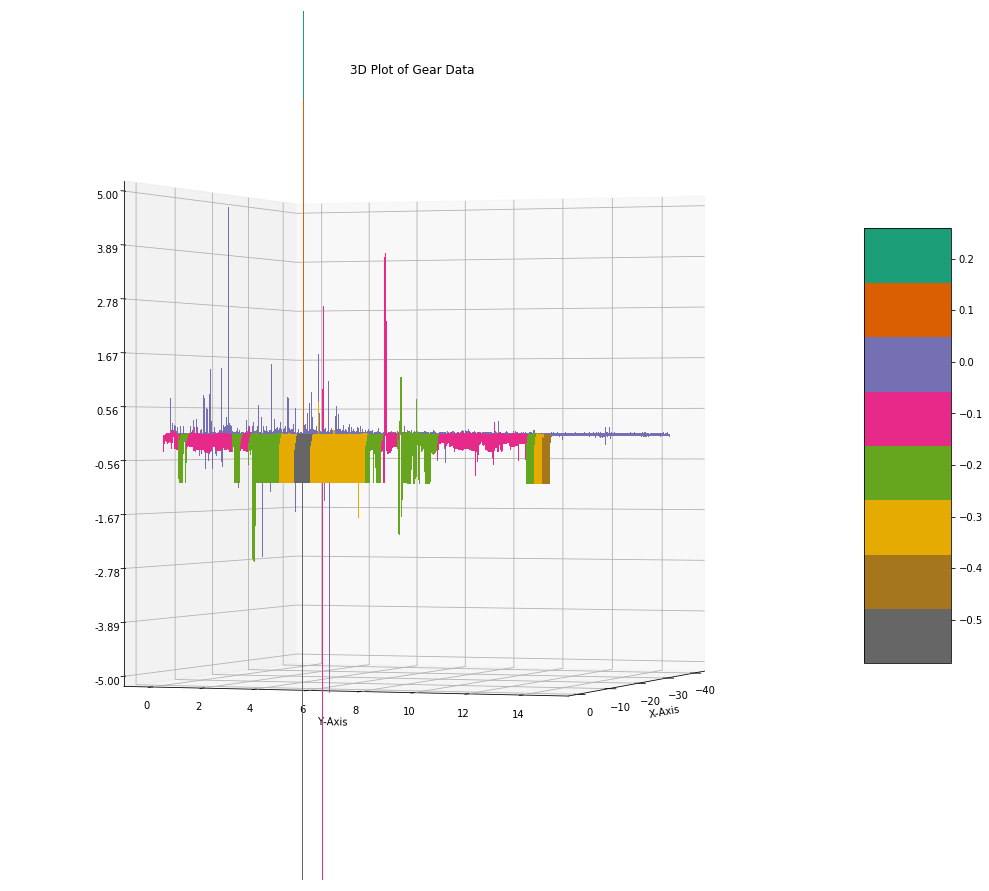

In [22]:
import time


fig = plt.figure(figsize=(18,16))
ax = fig.gca(projection='3d')
scale = 8
surf = ax.plot_surface(X1, Y1, Z, cmap=cm.Dark2_r,linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-5, 5)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.title("3D Plot of Gear Data")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

ax.view_init(0, 20)
fig.colorbar(surf, shrink=.5, aspect=5)

plt.show()
    


In [136]:
data.describe()

,0.0,-0.02,-0.04,-0.06,-0.08,-0.1,-0.12,-0.14,-0.16,-0.18,...,-40.82,-40.84,-40.86,-40.88,-40.9,-40.92,-40.94,-40.96,-40.98,-41.0
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,...,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,-0.591745,-0.465239,-0.554354,-0.338557,-0.318759,-0.305906,-0.287439,-0.276699,-0.268960,-0.258878,...,-0.015913,-0.015956,-0.020073,-0.017092,-0.016067,-0.015510,-0.018230,-0.018022,-0.018273,-0.017226
std,0.508296,0.638295,2.253791,0.279547,0.173381,0.139256,0.086358,0.078107,0.169810,0.114814,...,0.029650,0.084526,0.068990,0.015986,0.018050,0.020103,0.021826,0.023300,0.017011,0.016242
min,-2.619816,-5.661415,-35.662870,-3.358571,-2.699049,-1.707797,-0.999990,-0.999990,-4.527576,-1.711918,...,-0.222000,-0.889278,-1.823573,-0.247411,-0.240709,-0.169277,-0.272538,-0.240699,-0.192904,-0.203889
25%,-0.999990,-0.999990,-0.359260,-0.338557,-0.324687,-0.309342,-0.297564,-0.285867,-0.275965,-0.265830,...,-0.024652,-0.023971,-0.022593,-0.021526,-0.019859,-0.021294,-0.022397,-0.024334,-0.024644,-0.023562
50%,-0.365637,-0.330435,-0.319148,-0.311789,-0.302098,-0.286993,-0.279670,-0.271312,-0.263439,-0.254507,...,-0.015428,-0.015614,-0.015962,-0.015080,-0.014789,-0.014927,-0.016442,-0.017184,-0.016543,-0.015198
75%,-0.262897,-0.287195,-0.286332,-0.284490,-0.284487,-0.271923,-0.267074,-0.256726,-0.244916,-0.230541,...,-0.009031,-0.010094,-0.010181,-0.010889,-0.010488,-0.010886,-0.011365,-0.011618,-0.011108,-0.010990
max,3.667478,10.156587,0.449306,0.628981,0.849167,0.124524,0.152532,0.073296,-0.010606,0.859504,...,0.487904,2.035785,0.063119,0.061613,0.173108,0.289116,0.086455,0.397969,0.133924,0.093664


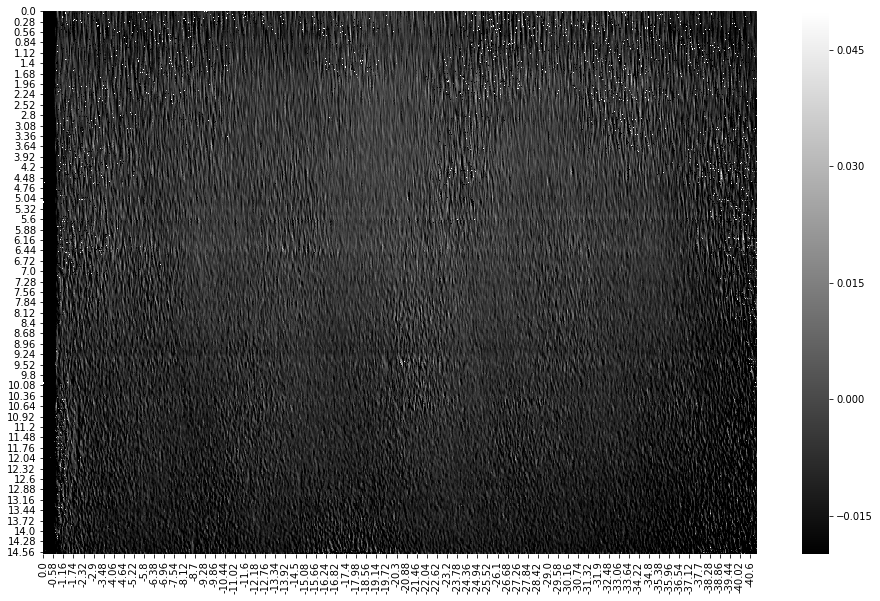

In [26]:
#sns.heatmap(data,vmin=-.02,vmax=.05,cmap='tab20c')
plt.figure(figsize=(16, 10))
sns.heatmap(data,vmin=-.02,vmax=.05,cmap='gray')


In [142]:
print("Number of training data: ",n,",Number of features in the data:",c)

Number of training data:  732 ,Number of features in the data: 2051


Get Image

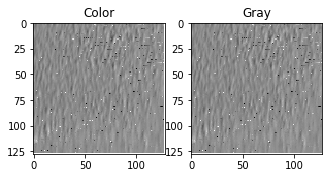

In [104]:
#image1 = '/Users/jm186072/Documents/DataScience/Jupyter Notebook/letter.png'
image1 = '/Users/jm186072/Documents/Jeetendra/Projects/1Japan-Presales/L1_lowerRight256_afterRem100micrometer.png'
size=128, 128

im        = Image.open(image1)
img_color = im.resize((size),Image.ANTIALIAS)
img_grey  = img_color.convert('L')

fig = plt.figure(figsize=(8, 8))

plt.subplot(1, 3,  1)
plt.imshow(img_color)
plt.title("Color")

plt.subplot(1, 3,  2)
plt.imshow(img_grey)
plt.title("Gray")

pixels = np.array(img_grey, dtype=np.float)

Compute DCT and Inverse DCT

In [105]:
dct_size = pixels.shape[0]
reconstructed_images = []

#2D Cosine Transform of Image
dct = fftpack.dct(fftpack.dct(pixels.T, norm='ortho').T, norm='ortho')


for ii in range(dct_size):
    dct_copy = dct.copy()
    dct_copy[ii:,:] = 0
    dct_copy[:,ii:] = 0
    
    # Reconstructed image
    # Get 2D Inverse Cosine Transform of Image
    r_img = fftpack.idct(fftpack.idct(dct_copy.T, norm='ortho').T, norm='ortho')
    
    img = r_img.clip(0, 255)
    img = img.astype('uint8')
    reconstructed_image = Image.fromarray(img)

    # Create a list of images
    reconstructed_images.append(reconstructed_image);

In [201]:
orig = np.histogram(pixels)
a= np.asmatrix(orig)
#np.histogram2d(a)

TypeError: histogram2d() missing 1 required positional argument: 'y'

Text(0.5,1,'Column sum')

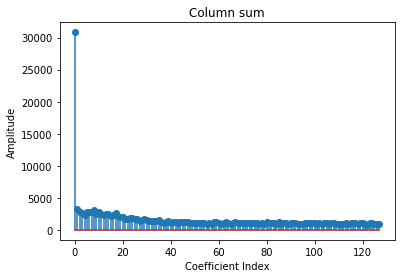

In [106]:
plt.stem(np.sum(np.abs(dct),axis=1))
plt.xlabel("Coefficient Index")
plt.ylabel("Amplitude")
plt.title('Column sum')


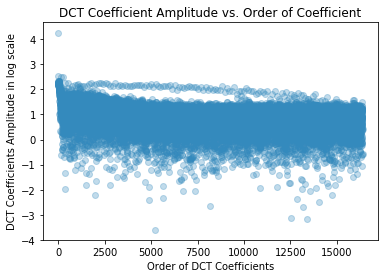

In [107]:
plt.figure(figsize=(6, 4));
plt.scatter(range(dct.ravel().size), np.log10(np.abs(dct.ravel())), c='#348ABD', alpha=.3);
plt.title('DCT Coefficient Amplitude vs. Order of Coefficient');
plt.xlabel('Order of DCT Coefficients');
plt.ylabel('DCT Coefficients Amplitude in log scale');

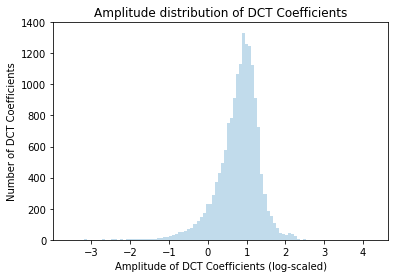

In [108]:
plt.figure(figsize=(6,4))
plt.hist(np.log10(np.abs(dct.ravel())), bins=100, color='#348ABD', alpha=.3, histtype='stepfilled');
plt.xlabel('Amplitude of DCT Coefficients (log-scaled)');
plt.ylabel('Number of DCT Coefficients');
plt.title('Amplitude distribution of DCT Coefficients');

Plotting Few Reconstructed images 

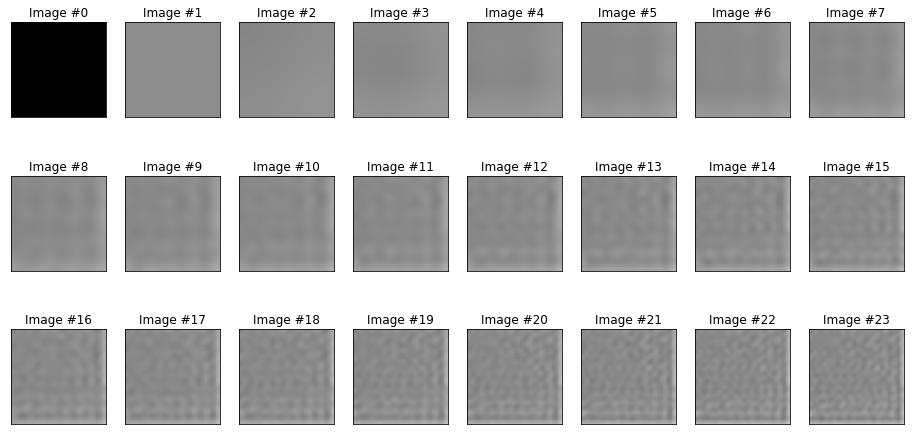

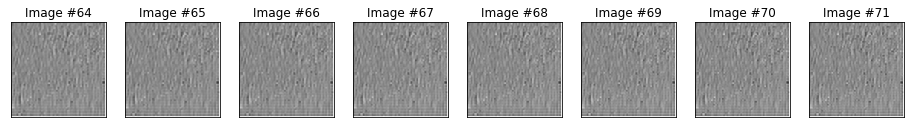

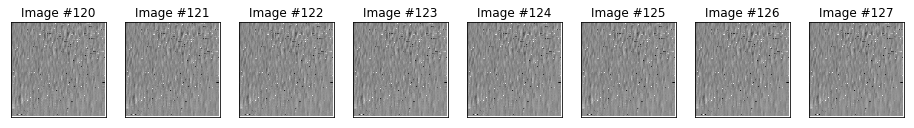

In [109]:
fig = plt.figure(figsize=(16, 8))
for ii in range(24):
    plt.subplot(3,  8, ii + 1)
    plt.imshow(reconstructed_images[ii], cmap=plt.cm.gray)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);
    plt.title("Image #" + str(ii) )   

fig = plt.figure(figsize=(16, 8))
for ii in range(8):
    plt.subplot(1, 8, ii+1)
    plt.imshow(reconstructed_images[64+ii], cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("Image #" + str(64+ii) )   


fig = plt.figure(figsize=(16, 8))
for ii in range(8):
    plt.subplot(1, 8, ii+1) 
    plt.imshow(reconstructed_images[120+ii], cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("Image #" + str(120+ii) )   


In [110]:
reconstructed_images_LPF = []
LPF_threA = 127 # 70 # 0 to 127
LPF_threB = 50 # 75 # 100 # 200 # 1000 # 10000 # 20 # 75 # 25 # 0 to 2000-ish
LPF_threC = 400

In [128]:
s1 = np.abs(dct).sum()
s2 = np.abs(dct_copy).sum()

In [129]:
print(s1,s2)

202867.14872496494 35029.8177738713


In [133]:
dct_size = pixels.shape[0]
reconstructed_images_LPF = []

#2D Cosine Transform of Image
dct = fftpack.dct(fftpack.dct(pixels.T, norm='ortho').T, norm='ortho')
final_dct = np.array([])

In [142]:
for ii in range(1):
    print(ii)
    dct_copy = dct.copy()
    #dct_copy[ii:,:] = 0
    #dct_copy[:,ii:] = 0
    dct_copy[np.where(abs(dct_copy)<LPF_threB)] = 0
    dct_copy = dct_copy.reshape(1,(128*128))
    #print(type(dct_copy))
    print(dct_copy.shape)
    dct_copy2 = dct_copy.copy()
    print(dct_copy2.shape)
    np.append(dct_copy,dct_copy2,axis=0)
    print(dct_copy.shape)
    print(dct_copy2.shape)
    
    # Reconstructed image
    # Get 2D Inverse Cosine Transform of Image
    #r_img = fftpack.idct(fftpack.idct(dct_copy.T, norm='ortho').T, norm='ortho')
    
    #img = r_img.clip(0, 255)
    #img = img.astype('uint8')
    #reconstructed_image = Image.fromarray(img)

    # Create a list of images
    #reconstructed_images_LPF.append(reconstructed_image);

0
(1, 16384)
(1, 16384)
(1, 16384)
(1, 16384)


In [162]:
size=256, 256
LPF_threA = 127 # 70 # 0 to 127
LPF_threB = 50 # 75 # 100 # 200 # 1000 # 10000 # 20 # 75 # 25 # 0 to 2000-ish
LPF_threC = 150

arr = np.zeros((1,2500), int)

for i in files:
    print(i)
    im = Image.open(image_dir+i)
    img_color = im.resize((size),Image.ANTIALIAS)
    img_grey  = img_color.convert('L')
    pixels = np.array(img_grey, dtype=np.float)
    dct = fftpack.dct(fftpack.dct(pixels.T, norm='ortho').T, norm='ortho')
    
    dct[np.where(abs(dct)<LPF_threB)] = 0
    
    dct_LPF = dct[:50,:50].reshape(1,2500)
    
    #print(dct_LPF.shape)
    #final_dct = np.vstack((final_dct,dct_to_write))
    arr = np.append(arr,dct_LPF,axis=0)

In [194]:
f = open('/Users/jm186072/Documents/DataScience/Jupyter Notebook/dct_L1.csv', 'w')
writer = csv.writer(f, lineterminator='\n')
#writer.writerow(list)
writer.writerows(arr[1:,:])
f.close()

65536

In [186]:
arr = np.zeros((1,16384), int)

In [187]:
arr.shape

(1, 16384)

In [188]:
arr

array([[0, 0, 0, ..., 0, 0, 0]])

In [189]:
arr.shape

(1, 16384)

In [177]:
dct = dct.reshape(1,16384)

In [178]:
arr = np.append(arr, np.array([[1,2,3]]), axis=0)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [190]:
arr = np.append(arr,dct,axis=0)

In [191]:
arr.shape

(2, 16384)

In [192]:
arr

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.80804844e+04, -3.32987783e+02,  1.96901409e+02, ...,
         2.32383494e-01, -2.59979935e+00, -2.67366959e-01]])

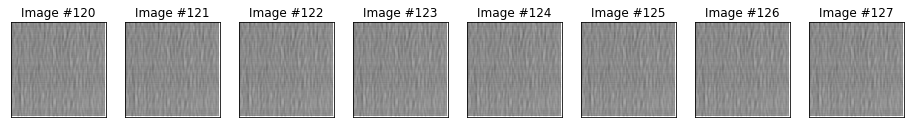

In [112]:
'''fig = plt.figure(figsize=(16, 8))
for ii in range(24):
    plt.subplot(3,  8, ii + 1)
    plt.imshow(reconstructed_images_LPF[ii], cmap=plt.cm.gray)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);
    plt.title("Image #" + str(ii) )   

fig = plt.figure(figsize=(16, 8))
for ii in range(8):
    plt.subplot(1, 8, ii+1)
    plt.imshow(reconstructed_images_LPF[64+ii], cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("Image #" + str(64+ii) )   '''


fig = plt.figure(figsize=(16, 8))
for ii in range(8):
    plt.subplot(1, 8, ii+1) 
    plt.imshow(reconstructed_images_LPF[120+ii], cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("Image #" + str(120+ii) )   


In [118]:
#dct[:1, :1] = 0.01 * dct[:1, :1]
dct_copy[:1, :1] = 0.01 * dct_copy[:1, :1]

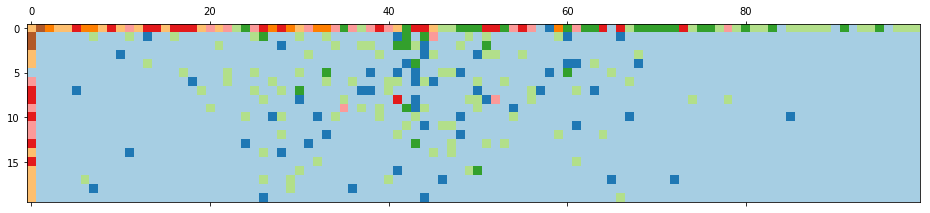

In [122]:
#plt.subplot(2,2,1)
plt.matshow(np.abs(dct_copy[:20,0:100]), cmap=plt.cm.Paired);

In [102]:
dct_to_write.shape

(1, 2500)

In [123]:
dct_to_write = dct_copy[:20,0:100].reshape(1,2000)

In [103]:
b

array([[23465.3515625 ,  2125.03643663,  1851.17103826, ...,
            0.        ,     0.        ,     0.        ]])

In [101]:
np.hstack((dct_to_write,b))

array([[23465.3515625 ,  2125.03643663,  1851.17103826, ...,
            0.        ,     0.        ,     0.        ]])

In [70]:
type(dct_to_write)

numpy.ndarray

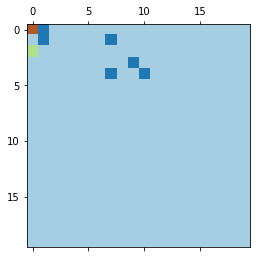

In [69]:
plt.matshow(np.abs(dct_copy[:20,0:20]), cmap=plt.cm.Paired);

Text(0.5,1,'Column sum')

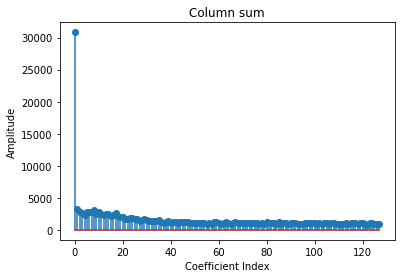

In [124]:
plt.stem(np.sum(np.abs(dct),axis=1))
plt.xlabel("Coefficient Index")
plt.ylabel("Amplitude")
plt.title('Column sum')

Text(0.5,1,'Column sum')

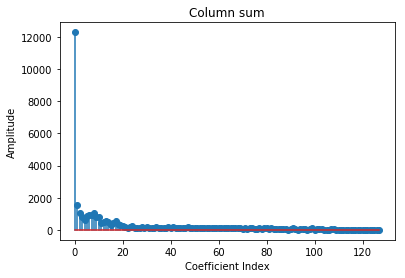

In [125]:
plt.stem(np.sum(np.abs(dct_copy),axis=1))
plt.xlabel("Coefficient Index")
plt.ylabel("Amplitude")
plt.title('Column sum')